# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.273121e+01     1.342663e+01
 * time: 0.002914905548095703
     1     6.194096e+01     9.223564e+00
 * time: 0.008666038513183594
     2     5.691143e+01     1.230651e+01
 * time: 0.09975695610046387
     3     4.040511e+01     8.053031e+00
 * time: 0.11790084838867188
     4     3.043300e+01     7.010527e+00
 * time: 0.13623690605163574
     5     2.417421e+01     5.582680e+00
 * time: 0.15190887451171875
     6     1.182531e+01     2.021401e+00
 * time: 0.16729092597961426
     7     9.512007e+00     2.695050e+00
 * time: 0.18048691749572754
     8     8.396344e+00     2.727037e+00
 * time: 0.19382786750793457
     9     7.831110e+00     1.044590e+00
 * time: 0.2069380283355713
    10     7.629017e+00     1.390250e+00
 * time: 0.21763992309570312
    11     7.457992e+00     6.385012e-01
 * time: 0.23111295700073242
    12     7.384747e+00     9.810944e-01
 * time: 0.2818338871002197
    13     7.290536e+00     8.274474e-01
 * time:

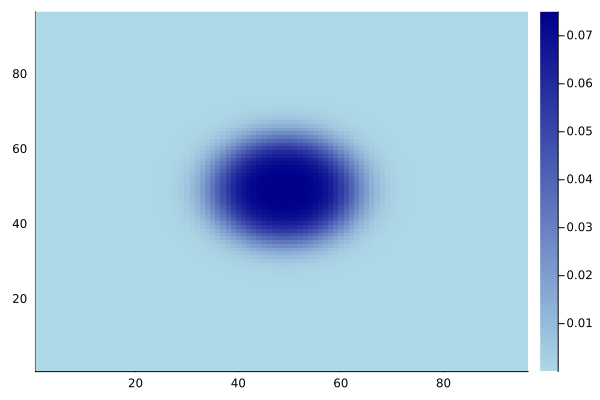

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)